Analizando Doja Cat Lyrics com Python
-> Gráficos ao final.

In [138]:
%matplotlib inline

import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

Explorando o Dataset

In [139]:
all_lyrics = pd.read_csv('Doja_Cat_lyrics_all.csv')

In [140]:
all_lyrics.columns

Index(['Unnamed: 0', 'Track Number', 'Track Title', 'Album Name',
       'Year Released', 'Lyric'],
      dtype='object')

In [141]:
all_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3248 non-null   int64 
 1   Track Number   3248 non-null   int64 
 2   Track Title    3248 non-null   object
 3   Album Name     3248 non-null   object
 4   Year Released  3248 non-null   int64 
 5   Lyric          3248 non-null   object
dtypes: int64(3), object(3)
memory usage: 152.4+ KB


In [142]:
all_lyrics.head()

,Unnamed: 0,Track Number,Track Title,Album Name,Year Released,Lyric
0,0,1,Woman,Planet Her,2021,"b'Hey, woman\n'"
1,1,1,Woman,Planet Her,2021,"b'Hey, woman\n'"
2,2,1,Woman,Planet Her,2021,b'Woman\n'
3,3,1,Woman,Planet Her,2021,b'Let me be your woman\n'
4,4,1,Woman,Planet Her,2021,"b'Woman, woman, woman (\n'"


In [143]:
all_lyrics.tail()

,Unnamed: 0,Track Number,Track Title,Album Name,Year Released,Lyric
3243,46,49,Control,Purrr! - EP,2014,"b'Way-o, oh ah\n'"
3244,47,49,Control,Purrr! - EP,2014,b'Way-o ah\n'
3245,48,49,Control,Purrr! - EP,2014,"b'Way-o, oh ah\n'"
3246,49,49,Control,Purrr! - EP,2014,b'Way-o ah\n'
3247,50,49,Control,Purrr! - EP,2014,"b'Way-o, oh ah\n'"


Limpando o Dataset

In [144]:
#Alterando Lyrics para minúscula
all_lyrics['new_lyrics'] = all_lyrics['Lyric'].str.lower()
#Removendo pontuações
all_lyrics['new_lyrics']= all_lyrics['new_lyrics'].str.replace('[^\w\s]',' ')
#Removendo Stopwords
stop = ['is','it','oh','of','uh','that','this','yeah','le','might',
        'a','am', 'was', 'were', 'been','la','hey','b', 'n','is','to','end','in','the','t']

all_lyrics['new_lyrics'] = all_lyrics['new_lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\nique\AppData\Local\Temp\ipykernel_17516\3959051773.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_lyrics['new_lyrics']= all_lyrics['new_lyrics'].str.replace('[^\w\s]',' ')


In [145]:
words_affirmation = ['love','friend','friendship','great','proud','baby','mine','feel','feelings','perfect',
                     'precious','like you','beauty']
quality_time = ['watch','never','now','time','spend','text','texting','follow','chill','alone','play',
                   'stay','party','talking','talk','sleep']
physical_touch = ['kiss','love','sex','fuck','eyes','fight','hold','sexuality','face','body','mouth','dick',
                'ass','touch','eye','pussy','eye']
acts_service = ['turn','clean','stay','act','patient','relax','drive','notice','work','need','wait','focused',
              'influence', 'struggle','sleep','share','sharing','honest']
receiving_gifts = ['weed','sweet','ticket','bussines','send','spent','t-shirt','tiffanys','camera','getting','get',
            'money','cash','more','ring','picture','clothes']

In [146]:
#Criando uma categoria para cada lista de palavra
words_affirmation_regex = '|'.join(words_affirmation)
quality_time_regex = '|'.join(quality_time)
physical_touch_regex = '|'.join(physical_touch)
acts_service_regex = '|'.join(acts_service)
receiving_gifts_regex = '|'.join(receiving_gifts)

#Nova coluna para cada categoria
all_lyrics['Words of Affirmation'] = all_lyrics['new_lyrics'].str.contains(words_affirmation_regex)
all_lyrics['Quality Time'] = all_lyrics['new_lyrics'].str.contains(quality_time_regex)
all_lyrics['Physical Touch'] = all_lyrics['new_lyrics'].str.contains(physical_touch_regex)
all_lyrics['Acts of Service'] = all_lyrics['new_lyrics'].str.contains(acts_service_regex)
all_lyrics['Receiving Gifts'] = all_lyrics['new_lyrics'].str.contains(receiving_gifts_regex)

#Contando e realizando soma de quantidade de vezes em que as palavras da categoria são mencionadas 
words_affirmation_count = sum(all_lyrics['Words of Affirmation'])
quality_time_count = sum(all_lyrics['Quality Time'])
physical_touch_count = sum(all_lyrics['Physical Touch'])
acts_service_count = sum(all_lyrics['Acts of Service'])
receiving_gifts_count = sum(all_lyrics['Receiving Gifts'])

#print
print("Words of Affirmation: ", words_affirmation_count)
print("Quality Time: ", quality_time_count)
print("Physical Touch: ", physical_touch_count)
print("Acts of Service: ", acts_service_count)
print("Receiving Gifts: ", receiving_gifts_count)



Words of Affirmation:  452
Quality Time:  497
Physical Touch:  377
Acts of Service:  290
Receiving Gifts:  374


Visualizando as menções através dos albums

In [147]:
#Novo dataframe agrupado pelo album
mentions = all_lyrics.groupby('Album Name').sum().reset_index()

In [148]:
mentions.sort_values(by='Words of Affirmation', ascending=False)

,Album Name,Unnamed: 0,Track Number,Year Released,Words of Affirmation,Quality Time,Physical Touch,Acts of Service,Receiving Gifts
2,Planet Her,37555,7071,2041210,133,118,144,75,124
0,Amala,26920,30164,1620454,120,172,103,70,67
4,Streets (Remixes),9662,5261,628531,94,32,22,55,65
1,Hot Pink,30222,20944,1673751,86,116,92,78,91
3,Purrr! - EP,9118,13865,594130,19,59,16,12,27


In [149]:
mentions.sort_values(by='Quality Time', ascending=False)

,Album Name,Unnamed: 0,Track Number,Year Released,Words of Affirmation,Quality Time,Physical Touch,Acts of Service,Receiving Gifts
0,Amala,26920,30164,1620454,120,172,103,70,67
2,Planet Her,37555,7071,2041210,133,118,144,75,124
1,Hot Pink,30222,20944,1673751,86,116,92,78,91
3,Purrr! - EP,9118,13865,594130,19,59,16,12,27
4,Streets (Remixes),9662,5261,628531,94,32,22,55,65


Entendendo o foco dos lyrics da Doja Cat através do tokenice

In [150]:
#Criando token das palavras
all_lyrics['lyrics_tok'] = all_lyrics['new_lyrics'].apply(lambda x: word_tokenize(x))

In [151]:
#Determinando palavras frequentemente usadas e criando nova lista.
word_list = [word for list_ in all_lyrics['lyrics_tok'] for word in list_]
#Função de contagem
word_frequency = collections.Counter(word_list)
#Organizando a frequência
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)
word_frequency

[('you', 1362),
 ('i', 1330),
 ('me', 496),
 ('like', 473),
 ('my', 413),
 ('and', 377),
 ('your', 264),
 ('s', 254),
 ('can', 252),
 ('on', 251),
 ('just', 249),
 ('na', 227),
 ('m', 226),
 ('all', 224),
 ('we', 220),
 ('baby', 214),
 ('don', 207),
 ('be', 191),
 ('ooh', 191),
 ('know', 190),
 ('got', 180),
 ('go', 179),
 ('get', 178),
 ('ain', 159),
 ('no', 159),
 ('up', 158),
 ('with', 156),
 ('down', 145),
 ('but', 144),
 ('when', 142),
 ('so', 136),
 ('see', 126),
 ('xe2', 122),
 ('what', 118),
 ('back', 117),
 ('she', 114),
 ('for', 102),
 ('x80', 102),
 ('want', 102),
 ('let', 101),
 ('now', 98),
 ('cause', 92),
 ('low', 91),
 ('keep', 87),
 ('take', 80),
 ('if', 80),
 ('he', 80),
 ('do', 79),
 ('out', 78),
 ('need', 77),
 ('wan', 77),
 ('way', 75),
 ('dun', 75),
 ('say', 71),
 ('off', 66),
 ('more', 66),
 ('come', 64),
 ('one', 64),
 ('boy', 63),
 ('talk', 63),
 ('mmm', 62),
 ('why', 61),
 ('could', 60),
 ('re', 60),
 ('fuck', 60),
 ('woman', 59),
 ('d', 59),
 ('light', 57),
 (

Entendendo sentimentos dos Lyrics

In [152]:
#Função para análise de sentimentos
sia = SentimentIntensityAnalyzer()
#Teste
sia.polarity_scores("I like Doja Cat!")

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199}

In [153]:
#Criando nova coluna e aplicando sia com a expressão lambda
all_lyrics['polarity'] = all_lyrics['new_lyrics'].apply(lambda x: sia.polarity_scores(x))

In [154]:
all_lyrics[['neg', 'neu', 'pos', 'compound']] = all_lyrics['polarity'].apply(pd.Series)
#Excluindo coluna
all_lyrics.drop('polarity', axis=1)

,Unnamed: 0,Track Number,Track Title,Album Name,Year Released,Lyric,new_lyrics,Words of Affirmation,Quality Time,Physical Touch,Acts of Service,Receiving Gifts,lyrics_tok,neg,neu,pos,compound
0,0,1,Woman,Planet Her,2021,"b'Hey, woman\n'",woman,False,False,False,False,False,[woman],0.0,1.0,0.0,0.0
1,1,1,Woman,Planet Her,2021,"b'Hey, woman\n'",woman,False,False,False,False,False,[woman],0.0,1.0,0.0,0.0
2,2,1,Woman,Planet Her,2021,b'Woman\n',woman,False,False,False,False,False,[woman],0.0,1.0,0.0,0.0
3,3,1,Woman,Planet Her,2021,b'Let me be your woman\n',let me be your woman,False,False,False,False,False,"[let, me, be, your, woman]",0.0,1.0,0.0,0.0
4,4,1,Woman,Planet Her,2021,"b'Woman, woman, woman (\n'",woman woman woman,False,False,False,False,False,"[woman, woman, woman]",0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,46,49,Control,Purrr! - EP,2014,"b'Way-o, oh ah\n'",way o ah,False,False,False,False,False,"[way, o, ah]",0.0,1.0,0.0,0.0
3244,47,49,Control,Purrr! - EP,2014,b'Way-o ah\n',way o ah,False,False,False,False,False,"[way, o, ah]",0.0,1.0,0.0,0.0
3245,48,49,Control,Purrr! - EP,2014,"b'Way-o, oh ah\n'",way o ah,False,False,False,False,False,"[way, o, ah]",0.0,1.0,0.0,0.0
3246,49,49,Control,Purrr! - EP,2014,b'Way-o ah\n',way o ah,False,False,False,False,False,"[way, o, ah]",0.0,1.0,0.0,0.0


In [155]:
#Calculando sentimento
pos = sum(all_lyrics['pos'])
neg = sum(all_lyrics['neg'])
compound = sum(all_lyrics['compound'])

#Print
print("positive: ", pos)
print("negative: ", neg)
print("compound: ", compound)

positive:  418.2469999999992
negative:  304.86800000000034
compound:  76.07029999999948


Descobrindo os sentimentos referentes a cada linguagem do amor

In [156]:
#Criando dataframes
words_affirmation = all_lyrics[all_lyrics['Words of Affirmation']==True]
quality_time = all_lyrics[all_lyrics['Quality Time']==True]
physical_touch = all_lyrics[all_lyrics['Physical Touch']==True]
acts_service = all_lyrics[all_lyrics['Acts of Service']==True]
receiving_gifts = all_lyrics[all_lyrics['Receiving Gifts']==True]

In [157]:
#Calculando sentimentos de cada dataframe utilizando o compound
words_affirmation_sentiment = words_affirmation['compound'].sum()
quality_time_sentiment = quality_time['compound'].sum()
physical_touch_sentiment = physical_touch['compound'].sum()
acts_service_sentiment =acts_service['compound'].sum()
receiving_gifts_sentiment = receiving_gifts['compound'].sum()

#Print
print("Words of Affirmation: ", words_affirmation_sentiment)
print("Quality Time: ", quality_time_sentiment)
print("Physical Touch: ", physical_touch_sentiment)
print("Acts of Service: ", acts_service_sentiment)
print("Receiving Gifts: ", receiving_gifts_sentiment)

Words of Affirmation:  96.9305
Quality Time:  -4.453099999999999
Physical Touch:  -22.5281
Acts of Service:  9.514000000000001
Receiving Gifts:  -2.9691999999999994


Gráficos

Text(0.5, 1.0, 'Linguagem do amor predominante em Doja Cat lyrics')

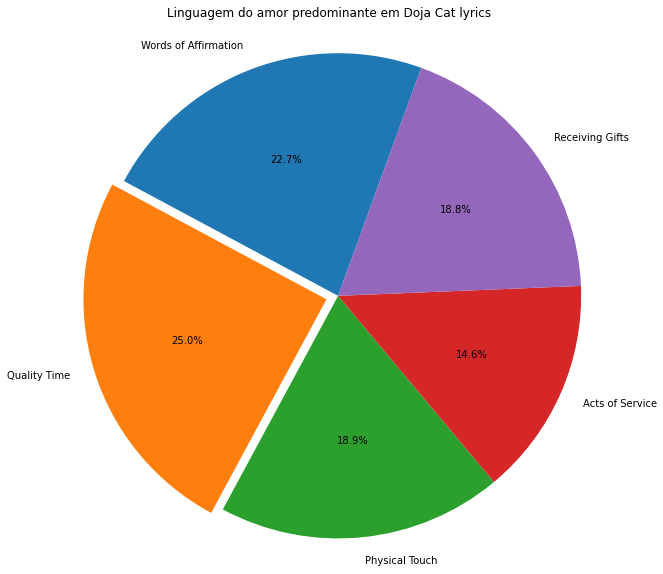

In [158]:
#Linguagem do amor predominante
linguagens = 'Words of Affirmation','Quality Time','Physical Touch','Acts of Service','Receiving Gifts'
linguagem_count = [words_affirmation_count,quality_time_count,physical_touch_count,
                   acts_service_count,receiving_gifts_count]
plt.figure(figsize=(10,10))
explode = (0,0.05,0,0,0)
plt.pie(linguagem_count,labels=linguagens,explode=explode,autopct='%1.1f%%',startangle=70)
plt.axis('equal')
plt.title('Linguagem do amor predominante em Doja Cat lyrics')